This dataset analysis went totally wrong. Do a favor for yourself and check the other dataset-analysis. Ignore this one

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

Filtering the dataframe

In [2]:
file = pd.read_csv('investments.csv')
del file['nok']
file.drop(file.loc[file['sector'] == 'Telecommunications'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Consumer Goods'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Financials'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Technology'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Consumer Services'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Industrials'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Utilities'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Basic Materials'].index, inplace= True)
file.drop(file.loc[file['sector'] == 'Oil & Gas'].index, inplace= True)

In [3]:
country = list(file['country'])

#remove duplicate contries from a list. So that we can 
def my_function(x):
  return list(dict.fromkeys(x))

mylist = my_function(country)
print(mylist)

['United States', 'China', 'France', 'South Korea', 'Switzerland', 'New Zealand', 'Denmark', 'Japan', 'South Africa', 'Taiwan', 'India', 'Saudi Arabia', 'Brazil', 'Spain', 'Italy', 'Australia', 'Belgium', 'Sweden', 'United Kingdom', 'Canada', 'Thailand', 'Germany', 'Hong Kong', 'Bangladesh', 'Poland', 'Egypt', 'Malaysia', 'Netherlands', 'Mexico', 'Indonesia', 'Israel', 'Slovenia', 'Russia', 'Romania', 'Finland', 'Latvia', 'Singapore', 'Hungary', 'Tunisia']


In [4]:
file.drop(file.loc[file['country'] == 'China'].index, inplace= True)
file.drop(file.loc[file['country'] == 'South Africa'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Taiwan'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Saudi Arabia'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Brazil'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Thailand'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Hong Kong'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Bangladesh'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Egypt'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Malaysia'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Indonesia'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Slovenia'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Russia'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Romania'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Latvia'].index, inplace= True)
file.drop(file.loc[file['country'] == 'Tunisia'].index, inplace= True)
file.reset_index()

file.head(5)

,name,usd,sector,ownership,country,id,type,voting
1,10X Genomics Inc,6840271,Health Care,0.04,United States,6185.0,equities,0.01
3,1Life Healthcare Inc,28574032,Health Care,0.49,United States,3535.0,equities,0.49
14,4D Molecular Therapeutics Inc,207250,Health Care,0.02,United States,8847.0,equities,0.02
20,908 Devices Inc,3054172,Health Care,0.20,United States,7445.0,equities,0.00
34,AB Science SA,13701941,Health Care,1.25,France,4924.0,equities,1.25


In [5]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50
rng = np.random

# Training Data.

#size of file index
indexSize = len(file.index)
X = np.arange(indexSize)
Y = np.array(file['usd'])
#X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
#Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [6]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [7]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    # Run training for the given number of steps.
    
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))
        

step: 50, loss: nan, W: nan, b: nan
step: 100, loss: nan, W: nan, b: nan
step: 150, loss: nan, W: nan, b: nan
step: 200, loss: nan, W: nan, b: nan
step: 250, loss: nan, W: nan, b: nan
step: 300, loss: nan, W: nan, b: nan
step: 350, loss: nan, W: nan, b: nan
step: 400, loss: nan, W: nan, b: nan
step: 450, loss: nan, W: nan, b: nan
step: 500, loss: nan, W: nan, b: nan
step: 550, loss: nan, W: nan, b: nan
step: 600, loss: nan, W: nan, b: nan
step: 650, loss: nan, W: nan, b: nan
step: 700, loss: nan, W: nan, b: nan
step: 750, loss: nan, W: nan, b: nan
step: 800, loss: nan, W: nan, b: nan
step: 850, loss: nan, W: nan, b: nan
step: 900, loss: nan, W: nan, b: nan
step: 950, loss: nan, W: nan, b: nan
step: 1000, loss: nan, W: nan, b: nan


Graphical display

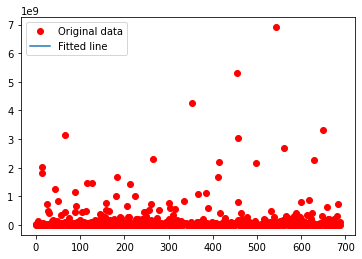

In [8]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

And so we can colclude that a big mistake was done where. Instead of first analysing the data and check if this model was apropiated. I didn´t. 

At this point i just sttoped dataset